Test whether y(k,M) could be the source of trouble for the 1-halo terms

In [1]:
%matplotlib inline

import shared_functions_wlp_wls as shared; 
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/dist-packages/halotools/sim_manager/halo_table_cache.py:12: UserWarning: Some of the functionality of the HaloTableCache classrequires h5py to be installed.
  warn("Some of the functionality of the HaloTableCache class"
/usr/local/lib/python2.7/dist-packages/halotools/sim_manager/user_supplied_ptcl_catalog.py:13: UserWarning: Most of the functionality of the sim_manager sub-package requires h5py to be installed,
which can be accomplished either with pip or conda
  warn("Most of the functionality of the sim_manager "
/usr/local/lib/python2.7/dist-packages/halotools/sim_manager/download_manager.py:39: UserWarning: Some of the functionality of the DownloadManager requires h5py to be installed,
which can be accomplished either with pip or conda
  warn("Some of the functionality of the DownloadManager requires h5py to be installed,\n"
/usr/local/lib/python2.7/dist-packages/halotools/sim_manager/cached_halo_catalog.py:15: UserWarning: Most of the functionality of the

In [2]:
def gety(M, kvec, rpts, survey):
    """ Fourier transforms the density profile to get the power spectrum. """
    # Get the nfw density profile at the correct mass and redshift and at a variety of r
    Rvir = shared.Rhalo(M, survey)
    rvec = np.logspace(-8, np.log10(Rvir), rpts)
    rho = shared.rho_NFW_ls(rvec, M, survey)  # Units Msol h^2 / Mpc^3, comoving. 

    u_ = np.zeros(len(kvec))
    for ki in range(0,len(kvec)):
        u_[ki]= 4. * np.pi / M * scipy.integrate.simps( rvec* np.sin(kvec[ki]*rvec)/ kvec[ki] * rho, rvec) # unitless / dimensionless.

    return u_

In [3]:
# We fix Mh to one value at a time for comparison
Mh = 10.**16
logkmin = -6; kpts =40000; logkmax = 5;
kvec_short = np.logspace(logkmin, logkmax, 40)

rpts = [10**6, 10**7]
y = [0]*len(rpts)
for ri in range(0,len(rpts)):
    y[ri] = gety(Mh, kvec_short, rpts[ri], 'SDSS')
    


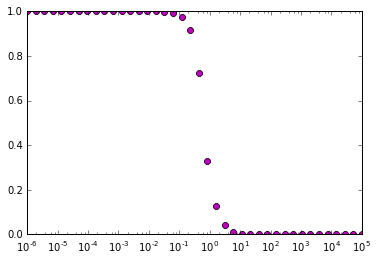

In [4]:
plt.figure()
plt.semilogx(kvec_short, y[0], 'ko')
plt.hold(True)
plt.semilogx(kvec_short, y[1], 'mo')
#plt.savefig('./plots/y_testres.pdf')
plt.show()

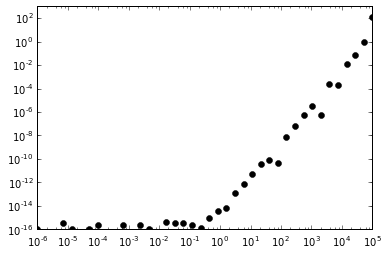

In [5]:
plt.figure()
plt.loglog(kvec_short, np.abs((y[0]-y[1])/ y[1]), 'ko')
#plt.savefig('./plots/y_testres_fracdiff.pdf')
plt.show()